In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.activations import linear,relu,sigmoid

In [4]:
x = np.load('data/X.npy')
y = np.load('data/y.npy')

In [5]:
print(x.shape,y.shape)

(5000, 400) (5000, 1)


In [6]:
def mySoftmax(z):
    ez = np.exp(z)
    return ez/np.sum(z)

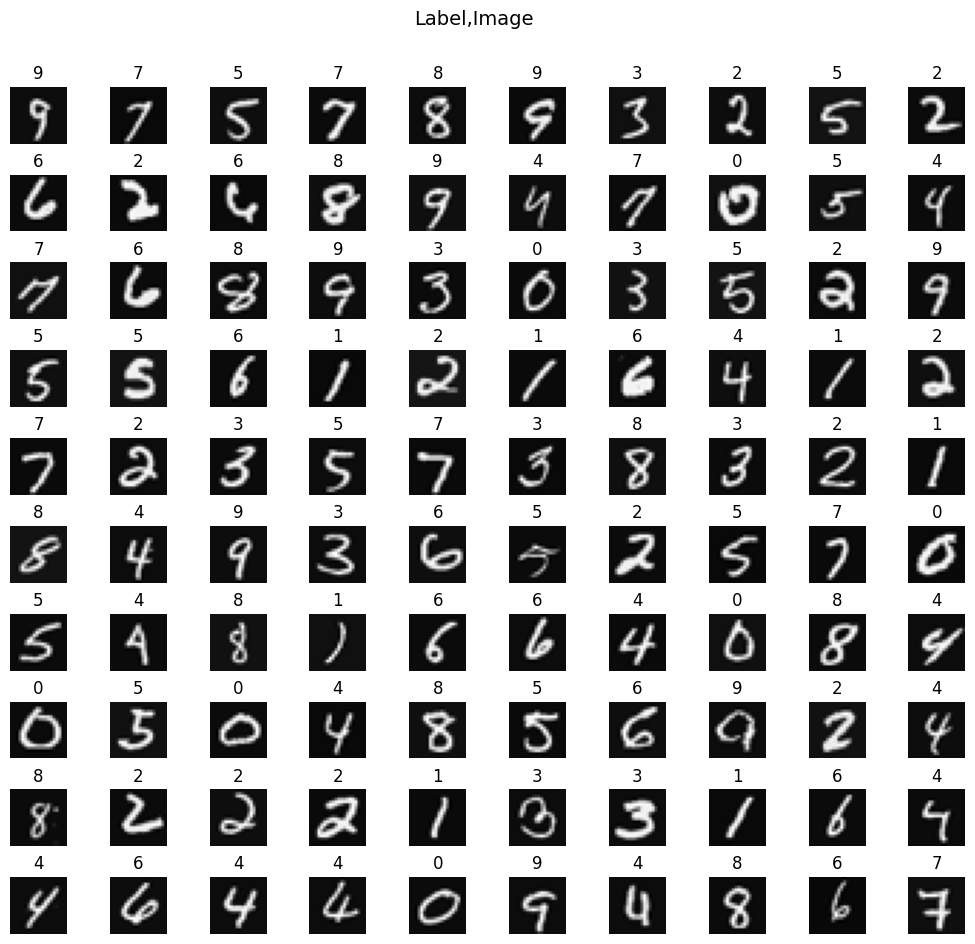

In [7]:
m,n = x.shape
fig,axes = plt.subplots(10,10,figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0,0.03,1,0.91])#type:ignore
for i,ax in enumerate(axes.flat):#type:ignore
    randIndex = np.random.randint(m)
    xRandomlyShaped = x[randIndex].reshape(20,20).T
    ax.imshow(xRandomlyShaped,cmap='gray')
    ax.set_title(y[randIndex,0])
    ax.set_axis_off()
    fig.suptitle("Label,Image",fontsize=14)

In [8]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(25,activation=relu,input_shape=(n,),name='L1'),
        Dense(15,activation=relu,name='L2'),
        Dense(10,activation=linear,name='L3')
    ],name='myModel'
)

In [9]:
model.summary()

Model: "myModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [10]:
[layer1,layer2,layer3] = model.layers

In [11]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()
print(f'w1 shape = {w1.shape}, b1 shape = {b1.shape}')
print(f'w2 shape = {w2.shape}, b2 shape = {b2.shape}')
print(f'w3 shape = {w3.shape}, b3 shape = {b3.shape}')

w1 shape = (400, 25), b1 shape = (25,)
w2 shape = (25, 15), b2 shape = (15,)
w3 shape = (15, 10), b3 shape = (10,)


In [12]:
model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)
history = model.fit(x,y,epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.4823
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5575
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3991
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3310
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2894
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2357
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2034
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1830
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1733
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1621
Epoch 13/40
157/157 [====

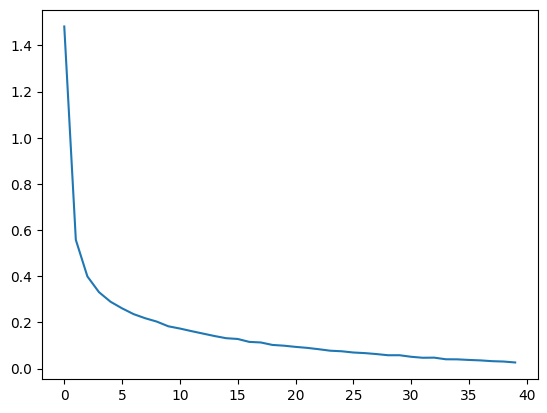

In [13]:
plt.plot(history.history['loss'])

1/1 [==============================] - 0s 287ms/step
2


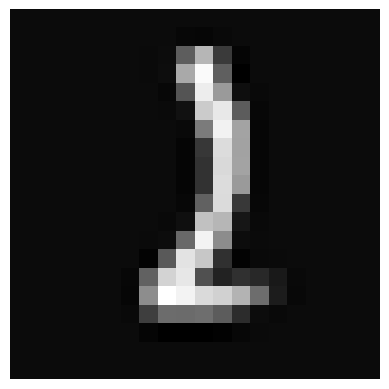

In [14]:
imageOfTwo = x[1015].reshape(1,400)
prediction = model.predict(imageOfTwo)
plt.imshow(imageOfTwo.reshape(20,20).T,cmap='gray')
plt.axis('off')
print(np.argmax(prediction))

1/1 [==============================] - 0s 17ms/step


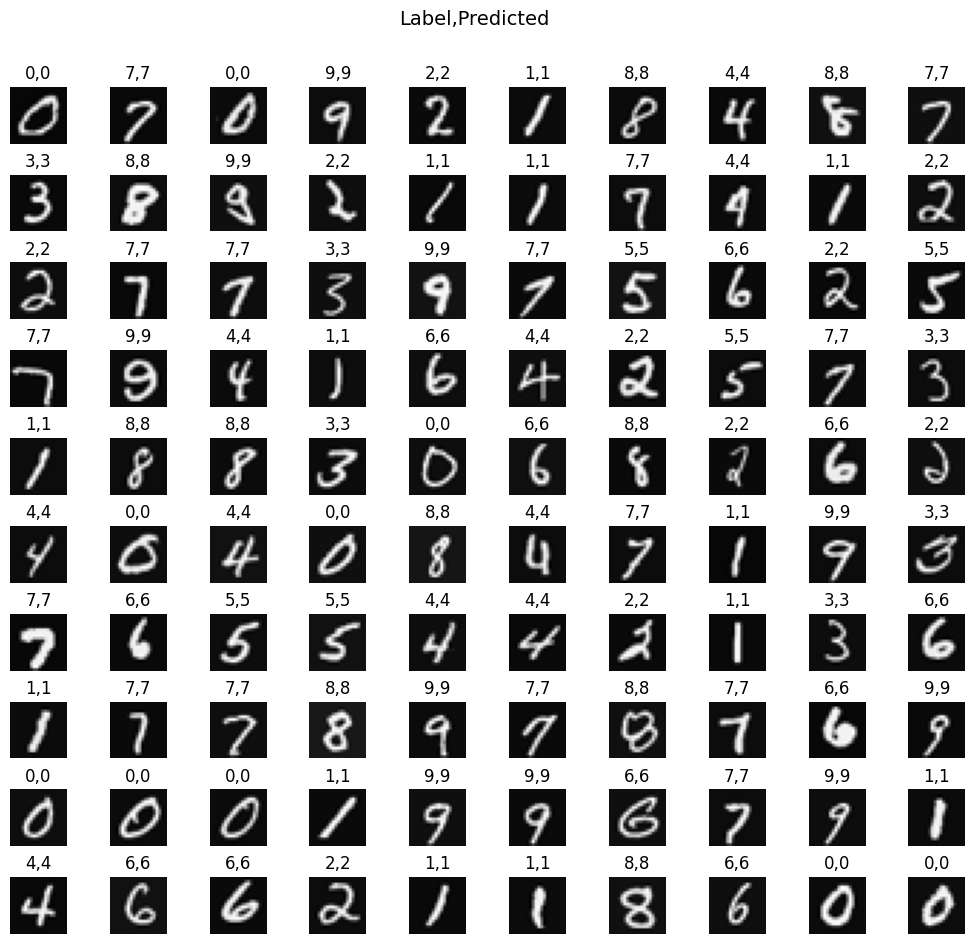

In [15]:
fig,axes = plt.subplots(10,10,figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0,0.03,1,0.91])#type:ignore
for i,ax in enumerate(axes.flat):#type:ignore
    randIndex = np.random.randint(m)
    xRandomlyShaped = x[randIndex].reshape(20,20).T
    prediction = model.predict(x[randIndex].reshape(1,400))
    ax.imshow(xRandomlyShaped,cmap='gray')
    ax.set_title(y[randIndex,0])
    ax.set_axis_off()
    ax.set_title(f'{y[randIndex,0]},{np.argmax(prediction)}')
    fig.suptitle("Label,Predicted",fontsize=14)